PYTHON PROJECT AXIA

This project is designed to demonstrate my Python data analysis skills
using the Pandas and Matplotlib libraries. I'll be working with raw
sales data , My  task is to clean it, explore it, and extract useful
business insights. The goal is to simulate the day-to-day
responsibilities of a data analyst: transforming messy data into clear,
actionable findings using Python.

In [253]:
#IMPORTING THE REQUIRED LIBRARIES

import pandas as pd
import matplotlib.pyplot as plt 

In [254]:
#GETTING THE DATA INTO PYTON TO BE STORED AS A DATAFRAME 
data = pd.read_csv("C:\\Users\\User\\Documents\\raw.csv" , index_col = 0, header = 1)


In [255]:
#GETTING A CLEARER VIEW OF THE DATASET

print(data.columns)


Index(['Order ID', 'Date', 'Product', 'Price', 'Quantity', 'Purchase Type',
       'Payment Method', 'Manager', 'City'],
      dtype='object')


In [256]:

data.head()

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
NaN,10452,7/11/2022,Fries,3.49,573.07,Online,Gift Card,Tom Jackson,London
NaN,10453,7/11/2022,Beverages,2.95,745.76,Online,Gift Card,Pablo Perez,Madrid
NaN,10454,7/11/2022,Sides & Other,4.99,200.40,In-store,Gift Card,Joao Silva,Lisbon
NaN,10455,8/11/2022,Burgers,12.99,569.67,In-store,Credit Card,Walter Muller,Berlin
NaN,10456,8/11/2022,Chicken Sandwiches,9.95,201.01,In-store,Credit Card,Walter Muller,Berlin


In [257]:
data.shape

(254, 9)

In [258]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 254 entries, nan to nan
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        254 non-null    int64  
 1   Date            254 non-null    object 
 2   Product         254 non-null    object 
 3   Price           254 non-null    float64
 4   Quantity        254 non-null    float64
 5   Purchase Type   254 non-null    object 
 6   Payment Method  254 non-null    object 
 7   Manager         254 non-null    object 
 8   City            254 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 19.8+ KB


In [259]:
data.dtypes

Order ID            int64
Date               object
Product            object
Price             float64
Quantity          float64
Purchase Type      object
Payment Method     object
Manager            object
City               object
dtype: object

In [260]:
data.isnull().sum()

Order ID          0
Date              0
Product           0
Price             0
Quantity          0
Purchase Type     0
Payment Method    0
Manager           0
City              0
dtype: int64

THE DESCRIPTIVE STATICTICS OF OUR DATASET 

THE TOTAL ROWS IS 254 AND THE COLUMNS ARE 9


In [261]:
#DESCRIPTIVE STATISTICS OF THE DATASET
data.describe()

,Order ID,Price,Quantity
count,254.000000,254.000000,254.000000
mean,10584.133858,7.102323,460.611457
std,75.889181,4.341855,214.888699
min,10452.000000,2.950000,200.400000
25%,10520.250000,3.490000,201.010000
50%,10583.500000,4.990000,538.880000
75%,10649.750000,9.950000,677.440000
max,10713.000000,29.050000,754.430000


QUESTION 1 

THE MOST PREFFERED METHOD OF PAYMENT IS CREDIT CARD WITH A STAGERRING NUMBER OF 120, FOLLOWED BY PAYMENT BY CASH(76), GIFTCARDS(58)

In [262]:
#THE MOST PREFERRED METHOD OF PAYMENT
#using counter to implement this operation
from collections import Counter
counts =Counter(data["Payment Method"])
most_preffered = counts.most_common(1)[0]

print ("the most preffered form of payment is " ,  most_preffered)

the most preffered form of payment is  (' Credit Card', 120)


QUESTION 2

#THE MOST SELLLING PRODUCT BY QUANTITY 


version A

In [263]:
#MOST SELLING PRODUCT BY QUANTITY ()
top_by_quantityA = data.query("Quantity == Quantity.max()")["Product"].values[0]
print("The top selling product by quantity is", top_by_quantityA)

The top selling product by quantity is Burgers


VERSION B

In [264]:
top_by_quantityB = data.nlargest(1, "Quantity")["Product"].values[0]
print("The top selling product by quantity is", top_by_quantityB)

The top selling product by quantity is Burgers


THUS THE MOST SELLING PRODUCTS BY QUANTITY ARE THE BEVERAGES 

#THE MOST SELLING PRODUCT BY REVENUE  


#VERSION A

In [265]:
#Creating the revenue column 
data["Revenue"] = data["Quantity"] * data["Price"]

In [266]:
top_by_revenueA= data.query("Revenue == Revenue.max()")["Product"].values[0]
print("The top selling product by revenue generated is", top_by_revenueA)

The top selling product by revenue generated is Fries


#VERSION B

In [267]:
top_by_revenueB = data.nlargest(1, "Revenue")["Product"].values[0]
print("The top selling product by revenue generated is", top_by_revenueB)

The top selling product by revenue generated is Fries


THUS THE MOST SELLING PRODUCT BY REVENUE IS FRIES 

QUESTION 3
Which City had maximum revenue, and Which Manager earned maximum REVENUE?

In [268]:
city_max_rev = data.nlargest(1, "Revenue")["City"].values[0]
manager_max_rev = data.query("Revenue == Revenue.max()")["Manager"].values[0]
print("the city with the maximum revenue is ", city_max_rev)
print("the manager with the maximum revenue generated is ", manager_max_rev)

the city with the maximum revenue is  Lisbon
the manager with the maximum revenue generated is  Joao Silva


the city with the maximum revenue is  Lisbon
and the  manager with the maximum revenue generated is  Joao Silva

QUESTION 4
What was the Average revenue?

In [269]:
avrg_revenue = data["Revenue"].mean()
print("the average revenue generated is", avrg_revenue)

the average revenue generated is 3029.5899968503945


QUESTION 5
What was the Average Revenue of November & December?

In [274]:
#converting the date to a more standardzed format to be able to subset the month 
data["Date"] = pd.to_datetime(data["Date"])
nov_date = data[(data["Date"].dt.month == 11)]
dec_date = data[(data["Date"].dt.month ==12 )]
nov_avrg_revenue = nov_date["Revenue"].mean()
dec_avrg_revenue = dec_date["Revenue"].mean()
print("the average revenue of the month November is ", nov_avrg_revenue)
print("And the average revenue for the month of December is", dec_avrg_revenue)


the average revenue of the month November is  2970.2529525773207
And the average revenue for the month of December is 3195.7490085106406


QUESTION 6 
What was the Standard Deviation of Revenue and Quantity?

In [271]:
std_rev = data["Revenue"].std()
std_quan = data["Quantity"].std()
print("The standard deviation of the revenue is ", std_rev)
print("And the standard deiation of the Quantity is ", std_quan)

The standard deviation of the revenue is  2420.11837804107
And the standard deiation of the Quantity is  214.88869921528863


QUESTION 7 
What was the Variance of Revenue and Quantity?

In [272]:
variance_rev = data["Revenue"].var()
variance_quan = data["Quantity"].var()
print("The variance of the revenue generated is ", variance_rev)
print("Ans also, the variance of the quantity is ", variance_quan)

The variance of the revenue generated is  5856972.963732139
Ans also, the variance of the quantity is  46177.15305043879


QUESTION 8
Was the revenue increasing or decreasing over the time?

Text(0, 0.5, 'REVENUE')

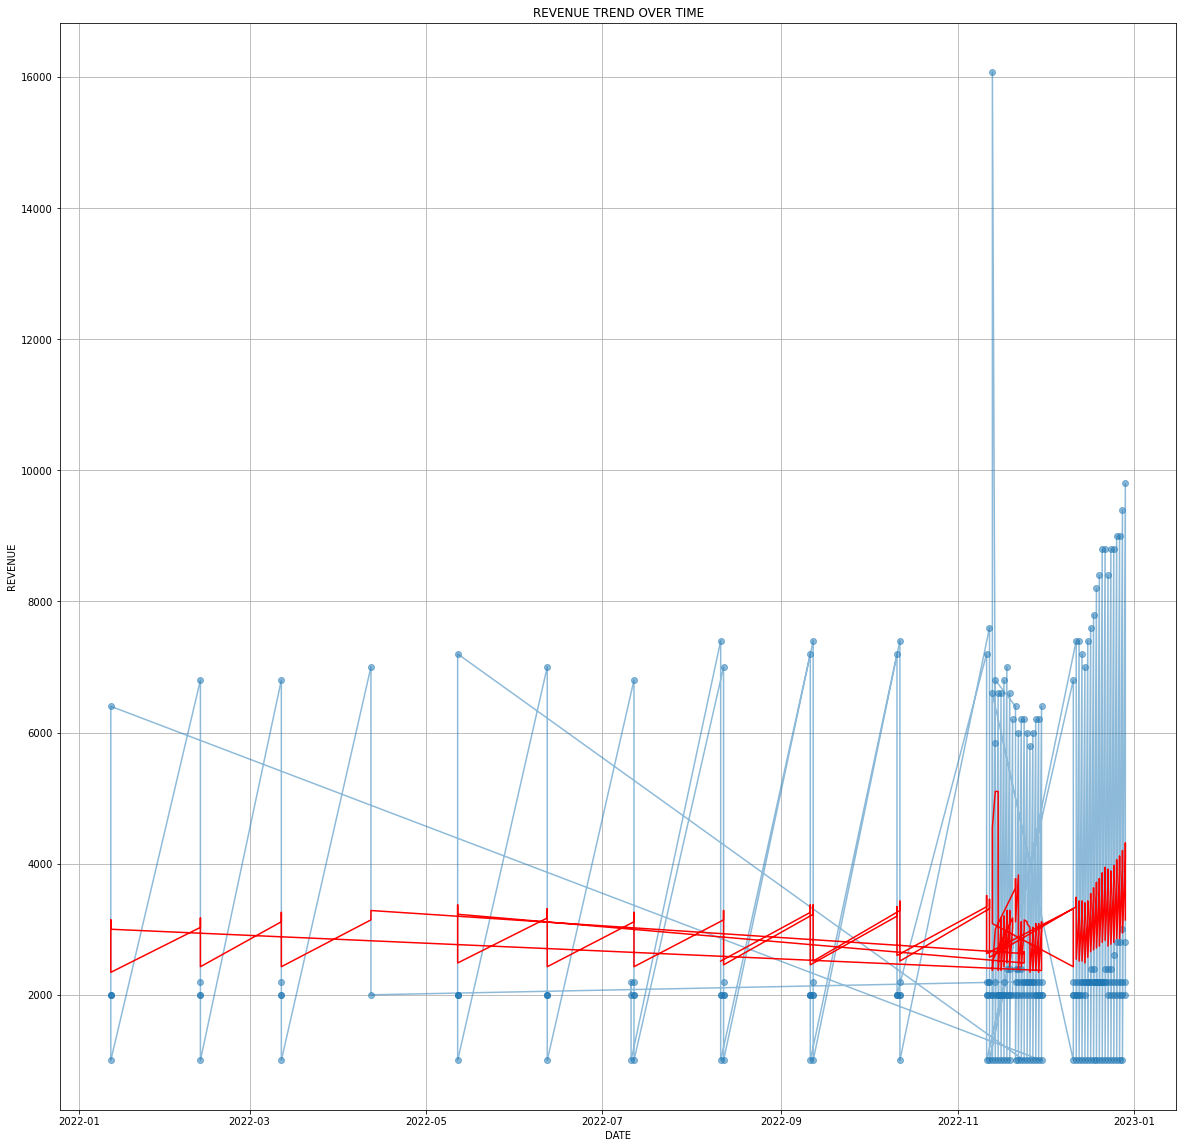

In [282]:
#USING A LINE CHART TO GET AN OVERVIEW OF THE TREND OF THE REVENUE USING A 7 DAYS ROLLING AVERAGE 
data["revenue_mv7"] = data["Revenue"].rolling(window=7).mean()
plt.figure(figsize=(20,20))
plt.plot(data["Date"], data["Revenue"], marker ="o", alpha=0.5, label = "Daily revenue")
plt.plot(data["Date"], data["revenue_mv7"], color = "red" , label = "7-days moving Average")
plt.grid(True)
plt.title("REVENUE TREND OVER TIME")
plt.xlabel("DATE")
plt.ylabel("REVENUE")

THE REVENUE ROSE STEADILY BEFORE A MORE PROMINIENT RISE IN 2023

QUESTION 9
What was the Average 'Quantity Sold' & 'Average Revenue' for each product?


USING GROUPBY AND MEAN 

In [288]:
avrg_rev_products = data.groupby("Product")["Revenue"].mean().reset_index()
print(avrg_rev_products)

              Product      Revenue
0           Beverages  2064.005260
1             Burgers  7249.996287
2  Chicken Sandwiches  2204.647981
3               Fries  2464.201771
4       Sides & Other   999.996000


1. Beverages average revenue is   2064.005260
2.Burgers average revenue is  7249.996287
3.Chicken  average revenue is Sandwiches  2204.647981
4. Fries  average revenue is  2464.201771
5.Sides & Other  average revenue is  999.996000

QUESTION 10 
What was the total number of orders or sales made?

In [290]:
total_sales = data["Quantity"].sum()
print("The total numberws of sales made is  ", total_sales)

The total numberws of sales made is   116995.31000000003
